## Ploting differentiation CTCF CHIP-SEQ DATA

In [1]:
import pandas as pd
ER4_filename = '/Users/cmdb/qbb2020-answers/week5-hw/ER4_counts.bed'
G1E_filename = '/Users/cmdb/qbb2020-answers/week5-hw/G1E_counts.bed'

ER4_file = open(ER4_filename, 'r+')
ER4_counts = []

previous_line = ''
for line in ER4_file: 
    line = line.strip()
    regions = ['promoter', 'intron', 'exon']
    if previous_line in regions:
        count = float(line)
        ER4_counts.append(count)
    previous_line = line
ER4_file.close()

G1E_file = open(G1E_filename, 'r')
G1E_counts = []

previous_line = ''
for line in G1E_file: 
    line = line.strip()
    regions = ['promoter', 'intron', 'exon']
    if previous_line in regions:
        count = float(line)
        G1E_counts.append(count)
    previous_line = line    
G1E_file.close()

counts_by_cell = pd.DataFrame([ER4_counts, G1E_counts], columns = regions)
counts_by_cell['cell'] = ['ER4', 'G1E']
counts_by_cell

,promoter,intron,exon,cell
0,55.0,52.0,298.0,ER4
1,43.0,32.0,275.0,G1E


In [29]:
gained_file = '/Users/cmdb/qbb2020-answers/week5-hw/CTCF_gained.bed'
lost_file = '/Users/cmdb/qbb2020-answers/week5-hw/CTCF_lost.bed'
columns = ['chr', 'start', 'stop', 'peak_id', 'peak_value']
d_gain = pd.read_csv(gained_file, sep = '\t', names = columns)
d_lost = pd.read_csv(lost_file, sep = '\t', names = columns)
d_lost

,chr,start,stop,peak_id,peak_value
0,chr19,3204686,3204687,G1E_peak_1,9.60448
1,chr19,3292163,3292164,G1E_peak_2,26.95260
2,chr19,3321007,3321008,G1E_peak_3,7.38299
3,chr19,3322455,3322456,G1E_peak_4,10.84910
4,chr19,3374203,3374204,G1E_peak_5,6.32617
...,...,...,...,...,...
572,chr19,60889741,60889742,G1E_peak_579,14.65460
573,chr19,60892333,60892334,G1E_peak_580,18.44030
574,chr19,61084678,61084679,G1E_peak_581,42.79560
575,chr19,61097931,61097932,G1E_peak_582,9.32866


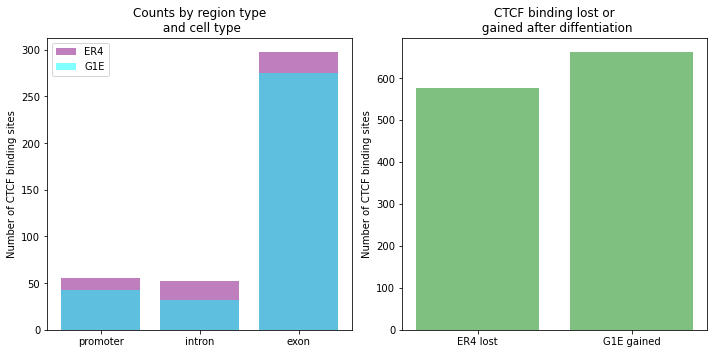

In [28]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize =(10,5))
axes = fig.subplots(nrows=1, ncols=2)

axes[0].bar(regions, ER4_counts, color = 'purple', alpha = 0.5)
axes[0].bar(regions, G1E_counts, color = 'cyan', alpha = 0.5)
axes[0].set_title('Counts by region type\n and cell type')
axes[0].set_ylabel('Number of CTCF binding sites')
axes[0].legend(['ER4', 'G1E'])

count_diff = [len(d_lost), len(d_gain)]
axes[1].bar(['ER4 lost', 'G1E gained'], count_diff, color = 'green', alpha =0.5)
axes[1].set_title('CTCF binding lost or\n gained after diffentiation')
axes[1].set_ylabel('Number of CTCF binding sites')

plt.tight_layout(pad=1.0)
plt.show()